<a href="https://colab.research.google.com/github/Dipin-Adhikari/Face-Mask-Detection/blob/main/Final_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab.patches import cv2_imshow

In [ ]:
img_directory = "/content/drive/MyDrive/New dataset for face mask"
categories = ["with_mask", "without_mask"]
data = []
labels = []

In [ ]:
for category in categories:
    path = os.path.join(img_directory, category)
    for i, img_name in enumerate(os.listdir(path)):
      img = cv2.imread(os.path.join(img_directory, category, img_name))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (224, 224))
      img = np.array(img)
      img = preprocess_input(img)
      data.append(img)
      labels.append(category)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)


In [ ]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)


In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/20
95/95 [==============================] - 140s 1s/step - loss: 0.3622 - accuracy: 0.8761 - val_loss: 0.1274 - val_accuracy: 0.9739
Epoch 2/20
95/95 [==============================] - 136s 1s/step - loss: 0.1397 - accuracy: 0.9654 - val_loss: 0.0681 - val_accuracy: 0.9817
Epoch 3/20
95/95 [==============================] - 135s 1s/step - loss: 0.0894 - accuracy: 0.9763 - val_loss: 0.0467 - val_accuracy: 0.9896
Epoch 4/20
95/95 [==============================] - 134s 1s/step - loss: 0.0767 - accuracy: 0.9796 - val_loss: 0.0388 - val_accuracy: 0.9922
Epoch 5/20
95/95 [==============================] - 135s 1s/step - loss: 0.0672 - accuracy: 0.9825 - val_loss: 0.0326 - val_accuracy: 0.9922
Epoch 6/20
95/95 [==============================] - 135s 1s/step - loss: 0.0521 - accuracy: 0.9845 - val_loss: 0.0309 - val_accuracy: 0.9935
Epoch 7/20
95/95 [==============================] - 135s 1s/step - loss: 0.0554 - accuracy: 0.9848 - val_loss: 0.0273 - val_accuracy: 0.9948
Epoch 8/20
95

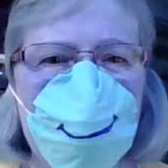

[[9.9987054e-01 1.2941776e-04]]


In [ ]:
path = "/content/drive/MyDrive/Face Mask Dataset/Test/WithMask/1174.png"

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resize = cv2.resize(img, (224, 224))

img_array = np.array(img_resize)

final = np.expand_dims(img_array, axis=0)

prediction = model.predict(final)

cv2_imshow(img)

print(prediction)